# *+ Processing with CHM & RN & biomass data +*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
biomass_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/Main_CHM_spectral_Site2020.csv'
df = pd.read_csv(biomass_data)
df.head()

,Site #,WGS84 N,WGS 84 E,Origin,Origin_ID,Dominant_specias,Species_ID,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,51.435741,30.107979,n,0,Birch,2,920,6.824,10300,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,51.434093,30.108523,a,1,Pine,0,3600,8.189,15100,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,51.434163,30.109196,a,1,Pine,0,4360,8.380,14600,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,51.434217,30.110484,a,1,Pine,0,3420,8.137,12700,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,51.434056,30.111980,a,1,Pine,0,2200,7.696,12100,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'ln_Tag_Cs', 'ln_Tag_Sr',
'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth',
'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2',
'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
'%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 
'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 
'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 
'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 
'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 
'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 
'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 
'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 
'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 
'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 
'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 
'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 
'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_Tag_Cs', 'ln_Tag_Sr', 'AEDR_mean',
                                    'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 
                                    'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 
                                    'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75'])

# Show the first five columns
select.head()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,contr_r_MIN,contr_r_MAX,contr_r_MEAN,...,contr_g_Q25,contr_g_Q50,contr_g_Q75,contr_b_MIN,contr_b_MAX,contr_b_MEAN,contr_b_STD,contr_b_Q25,contr_b_Q50,contr_b_Q75
0,6.824,9.240,1912,784,-0.73,2.58,2.33,9.481502,2933.677734,777.847542,...,541.256531,758.050110,1005.026367,9.379507,2713.600586,714.067764,332.963753,491.215576,684.545654,905.462463
1,8.189,9.622,2005,818,0.59,2.92,2.47,19.005865,1899.343872,833.407834,...,647.693115,887.856567,1150.706665,21.591255,1793.493042,766.078570,293.868420,563.713623,752.421997,964.777466
2,8.380,9.589,2001,818,0.78,2.88,2.44,94.267365,1968.408691,773.760888,...,588.255676,807.596130,1068.899292,80.702988,1761.097900,712.133098,272.526176,512.197632,689.422424,889.748047
3,8.137,9.449,2040,833,0.52,2.72,2.55,7.355157,2904.958740,711.545976,...,505.498962,732.743347,998.011780,9.797089,2518.435303,667.910072,299.595643,447.296204,641.451294,856.946899
4,7.696,9.401,1758,717,0.22,2.83,2.14,13.352172,3133.709961,806.127650,...,590.198303,842.132568,1103.787231,14.283794,2525.819336,755.761384,327.599176,527.639099,746.745300,968.327698


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ln_Cs_wood     103 non-null    float64
 1   ln_Sr_wood     103 non-null    float64
 2   Cs_2021_kBq_m  103 non-null    int64  
 3   Sr_2021_kBq_m  103 non-null    int64  
 4   ln_Tag_Cs      103 non-null    float64
 5   ln_Tag_Sr      103 non-null    float64
 6   AEDR_mean      103 non-null    float64
 7   contr_r_MIN    103 non-null    float64
 8   contr_r_MAX    103 non-null    float64
 9   contr_r_MEAN   103 non-null    float64
 10  contr_r_STD    103 non-null    float64
 11  contr_r_Q25    103 non-null    float64
 12  contr_r_Q50    103 non-null    float64
 13  contr_r_Q75    103 non-null    float64
 14  contr_g_MIN    103 non-null    float64
 15  contr_g_MAX    103 non-null    float64
 16  contr_g_MEAN   103 non-null    float64
 17  contr_g_STD    103 non-null    float64
 18  contr_g_Q2

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()

/tmp/ipykernel_20874/725619848.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()


Cs_wood_Bq/kg                                                \
                         count          mean          std      min       25%   
Dominant_specias                                                               
Alder                      4.0   3353.250000  4978.217444    360.0    864.75   
Aspen                      1.0  86400.000000          NaN  86400.0  86400.00   
Birch                     23.0   4489.043478  7412.075967     93.0    565.00   
Oak                        3.0   2550.000000  2248.088077    420.0   1375.00   
Pine                      71.0   3452.535211  7193.888267     34.0    590.00   
Spruce                     1.0    177.000000          NaN    177.0    177.00   

                                            Sr_wood_Bq/kg                \
                      50%      75%      max         count          mean   
Dominant_specias                                                          
Alder              1126.5   3615.0  10800.0           4.0   1534.000000   
Aspen             86400.0  86400.0  86400.0           1.0  65500.000000   
Birch              1360.0   3079.5  30700.0          23.0  67957.695652   
Oak                2330.0   3615.0   4900.0           3.0   2143.333333   
Pine               1040.0   2200.0  35200.0          71.0  15541.450704   
Spruce              177.0    177.0    177.0           1.0   2400.000000   

                                                                                
                            std      min      25%      50%      75%        max  
Dominant_specias                                                                
Alder                734.881396    526.0   1219.0   1755.0   2070.0     2100.0  
Aspen                       NaN  65500.0  65500.0  65500.0  65500.0    65500.0  
Birch             217382.739246   1260.0   4450.0   8030.0  20784.0  1050000.0  
Oak                 1338.220211    710.0   1535.0   2360.0   2860.0     3360.0  
Pine               41295.160700    435.0   2090.0   4780.0  11750.0   323600.0  
Spruce                      NaN   2400.0   2400.0   2400.0   2400.0     2400.0

In [6]:
# Descriptive statistics of main parameters
select.describe()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,contr_r_MIN,contr_r_MAX,contr_r_MEAN,...,contr_g_Q25,contr_g_Q50,contr_g_Q75,contr_b_MIN,contr_b_MAX,contr_b_MEAN,contr_b_STD,contr_b_Q25,contr_b_Q50,contr_b_Q75
count,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,...,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.04933,8.656485,3014.359223,1136.436893,-0.251845,2.464854,3.570291,29.534919,2511.986354,766.000754,...,641.169153,901.502855,1180.985742,32.391008,2712.352866,827.695538,349.854034,584.146224,811.233079,1047.783981
std,1.64946,1.472424,4988.505540,2019.773384,1.104536,0.904757,6.089170,49.649243,1340.330498,402.724570,...,240.919219,300.935943,358.329636,46.420771,864.116297,251.466656,93.673105,216.532754,263.192567,306.704451
min,3.52600,6.075000,423.000000,98.000000,-3.030000,0.390000,0.480000,-0.027178,0.805054,0.417302,...,128.989090,186.037750,262.800140,0.531948,832.155518,199.382755,109.232976,120.188545,175.167770,252.607666
25%,6.31900,7.664000,635.500000,199.500000,-0.725000,1.805000,0.710000,1.742763,1978.231751,633.735958,...,495.765656,723.074707,979.669098,5.277856,2123.614868,667.868117,292.544440,447.856689,639.053284,855.619751
50%,6.95700,8.472000,1145.000000,362.000000,-0.020000,2.600000,1.290000,7.970921,2722.256592,858.911069,...,640.676514,901.381104,1202.431396,15.266269,2601.248047,831.486847,341.904211,563.713623,815.357056,1063.953491
75%,7.91350,9.421000,2423.500000,966.000000,0.520000,3.160000,2.960000,33.764453,3268.150146,1065.068586,...,842.500641,1117.960938,1428.865540,46.832664,3045.944336,1039.339119,427.359073,759.041443,1030.824829,1273.864319
max,11.36700,13.864000,25173.000000,10477.000000,1.650000,4.660000,36.590000,249.526947,6225.004394,1586.523806,...,1251.066162,1681.644287,2124.060303,246.557938,6252.923340,1462.557110,588.661708,1150.023315,1473.567871,1833.971802


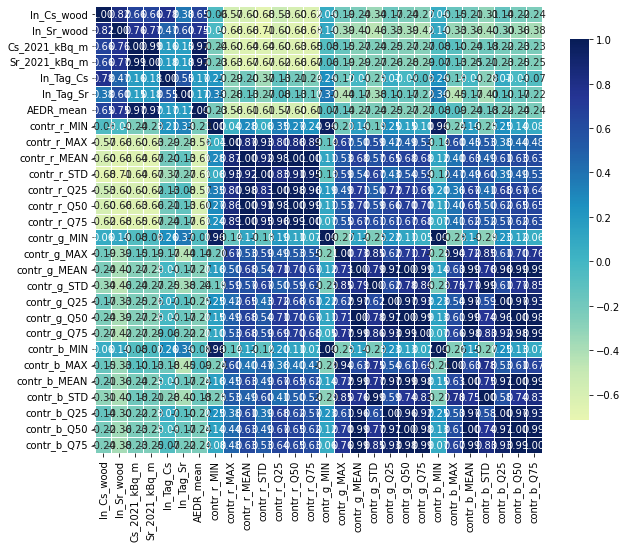

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [8]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 
                                   'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 
                                   'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75'])
y = pd.DataFrame(select, columns= ['ln_Tag_Sr'])

In [9]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): Yes


Selected "Yes"!!! A new column with random values was created.


In [10]:
# Columns in "X" data collections
X.head()

,contr_r_MIN,contr_r_MAX,contr_r_MEAN,contr_r_STD,contr_r_Q25,contr_r_Q50,contr_r_Q75,contr_g_MIN,contr_g_MAX,contr_g_MEAN,...,contr_b_MEAN,contr_b_STD,contr_b_Q25,contr_b_Q50,contr_b_Q75,Random1,Random2,Random3,Random4,Random5
0,9.481502,2933.677734,777.847542,360.273487,536.306519,746.253296,982.211853,9.634772,2961.898193,793.726915,...,714.067764,332.963753,491.215576,684.545654,905.462463,10.399167,9.256702,10.477824,12.384480,7.285738
1,19.005865,1899.343872,833.407834,323.958625,603.536560,815.666809,1054.089966,17.242392,2218.239746,907.262181,...,766.078570,293.868420,563.713623,752.421997,964.777466,10.844340,11.253895,9.757974,7.675745,10.595719
2,94.267365,1968.408691,773.760888,299.438354,551.243347,745.311951,971.663940,81.325912,2220.297119,841.001715,...,712.133098,272.526176,512.197632,689.422424,889.748047,5.805052,9.728432,11.566109,10.250016,9.547105
3,7.355157,2904.958740,711.545976,319.773395,475.958679,681.415588,912.117859,7.830567,3033.770752,772.110070,...,667.910072,299.595643,447.296204,641.451294,856.946899,11.661568,10.053825,9.622876,9.306866,9.485661
4,13.352172,3133.709961,806.127650,353.104284,557.816040,790.760193,1027.114380,13.923030,3003.818848,862.516837,...,755.761384,327.599176,527.639099,746.745300,968.327698,11.411725,7.590217,11.694881,8.851420,12.109963


In [11]:
# Columns in "y" data collections
y.head()

,ln_Tag_Sr
0,2.58
1,2.92
2,2.88
3,2.72
4,2.83


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.3189628989293215, -0.32319890371158744, -0.21485517411276067]
    Mean: -0.073
    Std: 0.281

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.06569543 0.68621685 1.14066347]
    Mean: 0.964
    Std: 0.199

 --------------------
Mean absolute error (MAE): 

    Scores: [0.7362003932680402, 0.6534388920840095, 0.8311687140605029]
    Mean: 0.740
    Std: 0.073

 --------------------


# Find optimal hyperparameters for XGBoost model

In [16]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [17]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=30, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Model with rank: 1
Mean validation score: -0.085 (std: 0.278)
Parameters: {'colsample_bytree': 0.22709347044416223, 'gamma': 0.06917302793405516, 'learning_rate': 0.019764217421037227, 'max_depth': 3, 'n_estimators': 120, 'subsample': 0.7338750743122269}



In [18]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.48486695, 0.19232168, 0.5190207 , 0.26218371, 0.48507595,
       0.40170741, 0.31344609, 0.49532537, 0.48752031, 0.16778221,
       0.19263768, 0.26700015, 0.32522678, 0.20835772, 0.14769421,
       0.39555106, 0.32706828, 0.47647715, 0.42002802, 0.45448928,
       0.45609717, 0.31445518, 0.48799496, 0.27423172, 0.19642467,
       0.56816406, 0.4471664 , 0.29373813, 0.18189878, 0.30477452]), 'std_fit_time': array([0.08042696, 0.00689284, 0.05202417, 0.00347648, 0.01437476,
       0.00861366, 0.00635539, 0.03530375, 0.00700401, 0.01433278,
       0.01504486, 0.00686723, 0.01556476, 0.00592345, 0.0320972 ,
       0.00552656, 0.01598525, 0.01287719, 0.01065721, 0.0343885 ,
       0.01181855, 0.01992721, 0.01274905, 0.00411649, 0.02827532,
       0.32583656, 0.01949359, 0.02097409, 0.01763549, 0.00504913]), 'mean_score_time': array([0.00771751, 0.00650835, 0.00693407, 0.00633907, 0.00629787,
       0.0062407 , 0.00627942, 0.00628738, 0.00633817, 0.00665088,
     

In [19]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.22709347044416223
Gamma: 0.06917302793405516
Learning_rate: 0.019764217421037227
Max_depth: 3
N_estimators: 120
Subsample: 0.7338750743122269


# Estimation of a basic XGBoost model using Loops

In [20]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(30):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:2.15820	validation_1-rmse:1.99463
[1]	validation_0-rmse:2.12301	validation_1-rmse:1.96040
[2]	validation_0-rmse:2.08650	validation_1-rmse:1.92603
[3]	validation_0-rmse:2.05342	validation_1-rmse:1.89430


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:2.01903	validation_1-rmse:1.86137
[5]	validation_0-rmse:1.98497	validation_1-rmse:1.83144
[6]	validation_0-rmse:1.95271	validation_1-rmse:1.80264
[7]	validation_0-rmse:1.92093	validation_1-rmse:1.77305
[8]	validation_0-rmse:1.88798	validation_1-rmse:1.74153
[9]	validation_0-rmse:1.85831	validation_1-rmse:1.71565
[10]	validation_0-rmse:1.82917	validation_1-rmse:1.69252
[11]	validation_0-rmse:1.79975	validation_1-rmse:1.66670
[12]	validation_0-rmse:1.77088	validation_1-rmse:1.64163
[13]	validation_0-rmse:1.74441	validation_1-rmse:1.61798
[14]	validation_0-rmse:1.71706	validation_1-rmse:1.59183
[15]	validation_0-rmse:1.68960	validation_1-rmse:1.56937
[16]	validation_0-rmse:1.66247	validation_1-rmse:1.54654
[17]	validation_0-rmse:1.63652	validation_1-rmse:1.52435
[18]	validation_0-rmse:1.61021	validation_1-rmse:1.50207
[19]	validation_0-rmse:1.58488	validation_1-rmse:1.47984
[20]	validation_0-rmse:1.56101	validation_1-rmse:1.46190
[21]	validation_0-rmse:1.53643	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.98847	validation_1-rmse:1.97771
[5]	validation_0-rmse:1.95468	validation_1-rmse:1.94682
[6]	validation_0-rmse:1.92221	validation_1-rmse:1.91579
[7]	validation_0-rmse:1.88966	validation_1-rmse:1.88679
[8]	validation_0-rmse:1.85860	validation_1-rmse:1.85923
[9]	validation_0-rmse:1.82788	validation_1-rmse:1.83242
[10]	validation_0-rmse:1.79873	validation_1-rmse:1.80732
[11]	validation_0-rmse:1.76982	validation_1-rmse:1.78189
[12]	validation_0-rmse:1.73926	validation_1-rmse:1.75750
[13]	validation_0-rmse:1.71108	validation_1-rmse:1.73288
[14]	validation_0-rmse:1.68441	validation_1-rmse:1.70884
[15]	validation_0-rmse:1.65857	validation_1-rmse:1.68855
[16]	validation_0-rmse:1.63313	validation_1-rmse:1.66652
[17]	validation_0-rmse:1.60908	validation_1-rmse:1.64766
[18]	validation_0-rmse:1.58448	validation_1-rmse:1.62712
[19]	validation_0-rmse:1.55976	validation_1-rmse:1.60814
[20]	validation_0-rmse:1.53558	validation_1-rmse:1.58487
[21]	validation_0-rmse:1.51270	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.58102	validation_1-rmse:1.59470
[19]	validation_0-rmse:1.55753	validation_1-rmse:1.57686
[20]	validation_0-rmse:1.53432	validation_1-rmse:1.56041
[21]	validation_0-rmse:1.51122	validation_1-rmse:1.54263
[22]	validation_0-rmse:1.48696	validation_1-rmse:1.52592
[23]	validation_0-rmse:1.46603	validation_1-rmse:1.50452
[24]	validation_0-rmse:1.44247	validation_1-rmse:1.48422
[25]	validation_0-rmse:1.42165	validation_1-rmse:1.46454
[26]	validation_0-rmse:1.40103	validation_1-rmse:1.44499
[27]	validation_0-rmse:1.38113	validation_1-rmse:1.42739
[28]	validation_0-rmse:1.36097	validation_1-rmse:1.40720
[29]	validation_0-rmse:1.34186	validation_1-rmse:1.38888
[30]	validation_0-rmse:1.32281	validation_1-rmse:1.37069
[31]	validation_0-rmse:1.30366	validation_1-rmse:1.34945
[32]	validation_0-rmse:1.28513	validation_1-rmse:1.33120
[33]	validation_0-rmse:1.26775	validation_1-rmse:1.31634
[34]	validation_0-rmse:1.24770	validation_1-rmse:1.29786
[35]	validation_0-rmse:1.23230	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.58459	validation_1-rmse:1.74677
[18]	validation_0-rmse:1.55926	validation_1-rmse:1.72589
[19]	validation_0-rmse:1.53527	validation_1-rmse:1.70597
[20]	validation_0-rmse:1.51230	validation_1-rmse:1.68781
[21]	validation_0-rmse:1.49043	validation_1-rmse:1.66666
[22]	validation_0-rmse:1.46713	validation_1-rmse:1.64334
[23]	validation_0-rmse:1.44550	validation_1-rmse:1.62520
[24]	validation_0-rmse:1.42329	validation_1-rmse:1.60633
[25]	validation_0-rmse:1.40137	validation_1-rmse:1.58705
[26]	validation_0-rmse:1.38004	validation_1-rmse:1.56633
[27]	validation_0-rmse:1.35958	validation_1-rmse:1.54976
[28]	validation_0-rmse:1.33883	validation_1-rmse:1.53312
[29]	validation_0-rmse:1.31982	validation_1-rmse:1.51664
[30]	validation_0-rmse:1.30027	validation_1-rmse:1.50058
[31]	validation_0-rmse:1.28063	validation_1-rmse:1.48620
[32]	validation_0-rmse:1.26197	validation_1-rmse:1.47141
[33]	validation_0-rmse:1.24357	validation_1-rmse:1.45657
[34]	validation_0-rmse:1.22541	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.60345	validation_1-rmse:1.75415
[18]	validation_0-rmse:1.58177	validation_1-rmse:1.73474
[19]	validation_0-rmse:1.55673	validation_1-rmse:1.71367
[20]	validation_0-rmse:1.53581	validation_1-rmse:1.70142
[21]	validation_0-rmse:1.51213	validation_1-rmse:1.67613
[22]	validation_0-rmse:1.49036	validation_1-rmse:1.65363
[23]	validation_0-rmse:1.46693	validation_1-rmse:1.63477
[24]	validation_0-rmse:1.44374	validation_1-rmse:1.61392
[25]	validation_0-rmse:1.42313	validation_1-rmse:1.59435
[26]	validation_0-rmse:1.40333	validation_1-rmse:1.57711
[27]	validation_0-rmse:1.38274	validation_1-rmse:1.56035
[28]	validation_0-rmse:1.36251	validation_1-rmse:1.54116
[29]	validation_0-rmse:1.34169	validation_1-rmse:1.52203
[30]	validation_0-rmse:1.32218	validation_1-rmse:1.50536
[31]	validation_0-rmse:1.30328	validation_1-rmse:1.49188
[32]	validation_0-rmse:1.28608	validation_1-rmse:1.47601
[33]	validation_0-rmse:1.26661	validation_1-rmse:1.46105
[34]	validation_0-rmse:1.24893	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:2.05692	validation_1-rmse:2.04976
[3]	validation_0-rmse:2.02543	validation_1-rmse:2.01846
[4]	validation_0-rmse:1.99336	validation_1-rmse:1.98831
[5]	validation_0-rmse:1.95979	validation_1-rmse:1.95389
[6]	validation_0-rmse:1.92943	validation_1-rmse:1.92806
[7]	validation_0-rmse:1.89610	validation_1-rmse:1.89322
[8]	validation_0-rmse:1.86564	validation_1-rmse:1.86672
[9]	validation_0-rmse:1.83612	validation_1-rmse:1.83531
[10]	validation_0-rmse:1.80620	validation_1-rmse:1.80862
[11]	validation_0-rmse:1.77642	validation_1-rmse:1.77754
[12]	validation_0-rmse:1.75023	validation_1-rmse:1.75212
[13]	validation_0-rmse:1.72338	validation_1-rmse:1.72494
[14]	validation_0-rmse:1.69638	validation_1-rmse:1.69772
[15]	validation_0-rmse:1.66944	validation_1-rmse:1.67220
[16]	validation_0-rmse:1.64159	validation_1-rmse:1.64248
[17]	validation_0-rmse:1.61569	validation_1-rmse:1.61555
[18]	validation_0-rmse:1.59014	validation_1-rmse:1.58848
[19]	validation_0-rmse:1.56706	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.55119	validation_1-rmse:1.51186
[21]	validation_0-rmse:1.52677	validation_1-rmse:1.49098
[22]	validation_0-rmse:1.50325	validation_1-rmse:1.47046
[23]	validation_0-rmse:1.48240	validation_1-rmse:1.45115
[24]	validation_0-rmse:1.46051	validation_1-rmse:1.43205
[25]	validation_0-rmse:1.43915	validation_1-rmse:1.41412
[26]	validation_0-rmse:1.41617	validation_1-rmse:1.39263
[27]	validation_0-rmse:1.39635	validation_1-rmse:1.37468
[28]	validation_0-rmse:1.37548	validation_1-rmse:1.35797
[29]	validation_0-rmse:1.35594	validation_1-rmse:1.33986
[30]	validation_0-rmse:1.33689	validation_1-rmse:1.32341
[31]	validation_0-rmse:1.31671	validation_1-rmse:1.30354
[32]	validation_0-rmse:1.29652	validation_1-rmse:1.28588
[33]	validation_0-rmse:1.27822	validation_1-rmse:1.27047
[34]	validation_0-rmse:1.25986	validation_1-rmse:1.25488
[35]	validation_0-rmse:1.24471	validation_1-rmse:1.24131
[36]	validation_0-rmse:1.22750	validation_1-rmse:1.23282
[37]	validation_0-rmse:1.21113	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.63447	validation_1-rmse:1.63376
[17]	validation_0-rmse:1.60981	validation_1-rmse:1.60672
[18]	validation_0-rmse:1.58923	validation_1-rmse:1.59149
[19]	validation_0-rmse:1.56668	validation_1-rmse:1.56722
[20]	validation_0-rmse:1.54400	validation_1-rmse:1.54867
[21]	validation_0-rmse:1.51893	validation_1-rmse:1.52453
[22]	validation_0-rmse:1.49556	validation_1-rmse:1.50007
[23]	validation_0-rmse:1.47241	validation_1-rmse:1.47456
[24]	validation_0-rmse:1.44965	validation_1-rmse:1.45084
[25]	validation_0-rmse:1.42701	validation_1-rmse:1.42690
[26]	validation_0-rmse:1.40619	validation_1-rmse:1.40450
[27]	validation_0-rmse:1.38693	validation_1-rmse:1.38518
[28]	validation_0-rmse:1.36501	validation_1-rmse:1.36276
[29]	validation_0-rmse:1.34445	validation_1-rmse:1.34055
[30]	validation_0-rmse:1.32453	validation_1-rmse:1.32397
[31]	validation_0-rmse:1.30715	validation_1-rmse:1.30350
[32]	validation_0-rmse:1.28928	validation_1-rmse:1.28851
[33]	validation_0-rmse:1.27076	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.53466	validation_1-rmse:1.40375
[22]	validation_0-rmse:1.51225	validation_1-rmse:1.38386
[23]	validation_0-rmse:1.48841	validation_1-rmse:1.36563
[24]	validation_0-rmse:1.46549	validation_1-rmse:1.35127
[25]	validation_0-rmse:1.44264	validation_1-rmse:1.33415
[26]	validation_0-rmse:1.41986	validation_1-rmse:1.31915
[27]	validation_0-rmse:1.39590	validation_1-rmse:1.30212
[28]	validation_0-rmse:1.37578	validation_1-rmse:1.28677
[29]	validation_0-rmse:1.35485	validation_1-rmse:1.27126
[30]	validation_0-rmse:1.33567	validation_1-rmse:1.25865
[31]	validation_0-rmse:1.31508	validation_1-rmse:1.24010
[32]	validation_0-rmse:1.29597	validation_1-rmse:1.22736
[33]	validation_0-rmse:1.27698	validation_1-rmse:1.21467
[34]	validation_0-rmse:1.25710	validation_1-rmse:1.20177
[35]	validation_0-rmse:1.23744	validation_1-rmse:1.19114
[36]	validation_0-rmse:1.21809	validation_1-rmse:1.17912
[37]	validation_0-rmse:1.20165	validation_1-rmse:1.16675
[38]	validation_0-rmse:1.18414	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.58790	validation_1-rmse:1.38175
[20]	validation_0-rmse:1.56200	validation_1-rmse:1.35997
[21]	validation_0-rmse:1.53881	validation_1-rmse:1.34070
[22]	validation_0-rmse:1.51602	validation_1-rmse:1.32285
[23]	validation_0-rmse:1.49174	validation_1-rmse:1.30388
[24]	validation_0-rmse:1.46931	validation_1-rmse:1.28642
[25]	validation_0-rmse:1.44713	validation_1-rmse:1.26822
[26]	validation_0-rmse:1.42681	validation_1-rmse:1.25165
[27]	validation_0-rmse:1.40601	validation_1-rmse:1.23470
[28]	validation_0-rmse:1.38389	validation_1-rmse:1.21682
[29]	validation_0-rmse:1.36157	validation_1-rmse:1.20111
[30]	validation_0-rmse:1.34207	validation_1-rmse:1.18647
[31]	validation_0-rmse:1.32238	validation_1-rmse:1.17317
[32]	validation_0-rmse:1.30280	validation_1-rmse:1.15896
[33]	validation_0-rmse:1.28108	validation_1-rmse:1.14830
[34]	validation_0-rmse:1.26137	validation_1-rmse:1.13527
[35]	validation_0-rmse:1.24376	validation_1-rmse:1.12507
[36]	validation_0-rmse:1.22444	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.60095	validation_1-rmse:1.72037
[18]	validation_0-rmse:1.57696	validation_1-rmse:1.69301
[19]	validation_0-rmse:1.55334	validation_1-rmse:1.66878
[20]	validation_0-rmse:1.53056	validation_1-rmse:1.64547
[21]	validation_0-rmse:1.50639	validation_1-rmse:1.62247
[22]	validation_0-rmse:1.48595	validation_1-rmse:1.60695
[23]	validation_0-rmse:1.46395	validation_1-rmse:1.58067
[24]	validation_0-rmse:1.44195	validation_1-rmse:1.55615
[25]	validation_0-rmse:1.42201	validation_1-rmse:1.53525
[26]	validation_0-rmse:1.40093	validation_1-rmse:1.51368
[27]	validation_0-rmse:1.38084	validation_1-rmse:1.49025
[28]	validation_0-rmse:1.36134	validation_1-rmse:1.46990
[29]	validation_0-rmse:1.34257	validation_1-rmse:1.45180
[30]	validation_0-rmse:1.32301	validation_1-rmse:1.43238
[31]	validation_0-rmse:1.30444	validation_1-rmse:1.41077
[32]	validation_0-rmse:1.28725	validation_1-rmse:1.39358
[33]	validation_0-rmse:1.27157	validation_1-rmse:1.37724
[34]	validation_0-rmse:1.25418	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.51215	validation_1-rmse:1.64440
[21]	validation_0-rmse:1.48901	validation_1-rmse:1.62053
[22]	validation_0-rmse:1.46953	validation_1-rmse:1.60267
[23]	validation_0-rmse:1.44709	validation_1-rmse:1.58376
[24]	validation_0-rmse:1.42607	validation_1-rmse:1.56003
[25]	validation_0-rmse:1.40550	validation_1-rmse:1.53754
[26]	validation_0-rmse:1.38518	validation_1-rmse:1.51519
[27]	validation_0-rmse:1.36552	validation_1-rmse:1.49830
[28]	validation_0-rmse:1.34498	validation_1-rmse:1.47852
[29]	validation_0-rmse:1.32681	validation_1-rmse:1.45834
[30]	validation_0-rmse:1.30767	validation_1-rmse:1.43985
[31]	validation_0-rmse:1.28901	validation_1-rmse:1.42299
[32]	validation_0-rmse:1.27099	validation_1-rmse:1.40218
[33]	validation_0-rmse:1.25114	validation_1-rmse:1.38193
[34]	validation_0-rmse:1.23213	validation_1-rmse:1.36598
[35]	validation_0-rmse:1.21701	validation_1-rmse:1.34611
[36]	validation_0-rmse:1.19955	validation_1-rmse:1.32948
[37]	validation_0-rmse:1.18374	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.58085	validation_1-rmse:1.51462
[20]	validation_0-rmse:1.55731	validation_1-rmse:1.49849
[21]	validation_0-rmse:1.53186	validation_1-rmse:1.48001
[22]	validation_0-rmse:1.50684	validation_1-rmse:1.45716
[23]	validation_0-rmse:1.48509	validation_1-rmse:1.44197
[24]	validation_0-rmse:1.46216	validation_1-rmse:1.42534
[25]	validation_0-rmse:1.43983	validation_1-rmse:1.40724
[26]	validation_0-rmse:1.41637	validation_1-rmse:1.38610
[27]	validation_0-rmse:1.39494	validation_1-rmse:1.36752
[28]	validation_0-rmse:1.37415	validation_1-rmse:1.35329
[29]	validation_0-rmse:1.35119	validation_1-rmse:1.33470
[30]	validation_0-rmse:1.33022	validation_1-rmse:1.31899
[31]	validation_0-rmse:1.30913	validation_1-rmse:1.30363
[32]	validation_0-rmse:1.29154	validation_1-rmse:1.29275
[33]	validation_0-rmse:1.27100	validation_1-rmse:1.28145
[34]	validation_0-rmse:1.25303	validation_1-rmse:1.26641
[35]	validation_0-rmse:1.23516	validation_1-rmse:1.25486
[36]	validation_0-rmse:1.21547	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.53066	validation_1-rmse:1.57221
[21]	validation_0-rmse:1.50640	validation_1-rmse:1.55342
[22]	validation_0-rmse:1.48416	validation_1-rmse:1.53774
[23]	validation_0-rmse:1.46342	validation_1-rmse:1.52423
[24]	validation_0-rmse:1.44209	validation_1-rmse:1.50579
[25]	validation_0-rmse:1.41965	validation_1-rmse:1.48998
[26]	validation_0-rmse:1.39627	validation_1-rmse:1.47002
[27]	validation_0-rmse:1.37620	validation_1-rmse:1.45315
[28]	validation_0-rmse:1.35501	validation_1-rmse:1.43574
[29]	validation_0-rmse:1.33528	validation_1-rmse:1.42095
[30]	validation_0-rmse:1.31548	validation_1-rmse:1.40977
[31]	validation_0-rmse:1.29432	validation_1-rmse:1.39479
[32]	validation_0-rmse:1.27621	validation_1-rmse:1.38232
[33]	validation_0-rmse:1.25845	validation_1-rmse:1.37011
[34]	validation_0-rmse:1.23964	validation_1-rmse:1.35755
[35]	validation_0-rmse:1.22500	validation_1-rmse:1.34486
[36]	validation_0-rmse:1.20663	validation_1-rmse:1.32957
[37]	validation_0-rmse:1.18951	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.57195	validation_1-rmse:1.48421
[20]	validation_0-rmse:1.54678	validation_1-rmse:1.46227
[21]	validation_0-rmse:1.52459	validation_1-rmse:1.44321
[22]	validation_0-rmse:1.50045	validation_1-rmse:1.42308
[23]	validation_0-rmse:1.47857	validation_1-rmse:1.40655
[24]	validation_0-rmse:1.45452	validation_1-rmse:1.38512
[25]	validation_0-rmse:1.43162	validation_1-rmse:1.36607
[26]	validation_0-rmse:1.40953	validation_1-rmse:1.34897
[27]	validation_0-rmse:1.38973	validation_1-rmse:1.33076
[28]	validation_0-rmse:1.36874	validation_1-rmse:1.31657
[29]	validation_0-rmse:1.34927	validation_1-rmse:1.29990
[30]	validation_0-rmse:1.33185	validation_1-rmse:1.28417
[31]	validation_0-rmse:1.31257	validation_1-rmse:1.26767
[32]	validation_0-rmse:1.29363	validation_1-rmse:1.25354
[33]	validation_0-rmse:1.27573	validation_1-rmse:1.23947
[34]	validation_0-rmse:1.25452	validation_1-rmse:1.22387
[35]	validation_0-rmse:1.23715	validation_1-rmse:1.21050
[36]	validation_0-rmse:1.21866	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.58067	validation_1-rmse:1.03772
[22]	validation_0-rmse:1.55647	validation_1-rmse:1.01616
[23]	validation_0-rmse:1.53327	validation_1-rmse:0.99529
[24]	validation_0-rmse:1.50905	validation_1-rmse:0.97424
[25]	validation_0-rmse:1.48584	validation_1-rmse:0.95504
[26]	validation_0-rmse:1.46339	validation_1-rmse:0.93756
[27]	validation_0-rmse:1.44384	validation_1-rmse:0.92016
[28]	validation_0-rmse:1.42180	validation_1-rmse:0.90457
[29]	validation_0-rmse:1.40269	validation_1-rmse:0.89224
[30]	validation_0-rmse:1.38113	validation_1-rmse:0.87792
[31]	validation_0-rmse:1.35933	validation_1-rmse:0.86224
[32]	validation_0-rmse:1.33816	validation_1-rmse:0.84850
[33]	validation_0-rmse:1.31727	validation_1-rmse:0.83721
[34]	validation_0-rmse:1.29731	validation_1-rmse:0.82369
[35]	validation_0-rmse:1.27802	validation_1-rmse:0.81263
[36]	validation_0-rmse:1.26033	validation_1-rmse:0.80290
[37]	validation_0-rmse:1.24410	validation_1-rmse:0.79491
[38]	validation_0-rmse:1.22716	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.54287	validation_1-rmse:1.55793
[21]	validation_0-rmse:1.51845	validation_1-rmse:1.53723
[22]	validation_0-rmse:1.49643	validation_1-rmse:1.52180
[23]	validation_0-rmse:1.47253	validation_1-rmse:1.50242
[24]	validation_0-rmse:1.44949	validation_1-rmse:1.48408
[25]	validation_0-rmse:1.42987	validation_1-rmse:1.47038
[26]	validation_0-rmse:1.40899	validation_1-rmse:1.45113
[27]	validation_0-rmse:1.38882	validation_1-rmse:1.43378
[28]	validation_0-rmse:1.36782	validation_1-rmse:1.41659
[29]	validation_0-rmse:1.34639	validation_1-rmse:1.39724
[30]	validation_0-rmse:1.32620	validation_1-rmse:1.37966
[31]	validation_0-rmse:1.30556	validation_1-rmse:1.36236
[32]	validation_0-rmse:1.28803	validation_1-rmse:1.34711
[33]	validation_0-rmse:1.26926	validation_1-rmse:1.33194
[34]	validation_0-rmse:1.24960	validation_1-rmse:1.31731
[35]	validation_0-rmse:1.23091	validation_1-rmse:1.30358
[36]	validation_0-rmse:1.21343	validation_1-rmse:1.29029
[37]	validation_0-rmse:1.19608	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.52403	validation_1-rmse:1.63024
[21]	validation_0-rmse:1.49889	validation_1-rmse:1.60507
[22]	validation_0-rmse:1.47583	validation_1-rmse:1.58828
[23]	validation_0-rmse:1.45280	validation_1-rmse:1.56795
[24]	validation_0-rmse:1.42933	validation_1-rmse:1.54549
[25]	validation_0-rmse:1.40762	validation_1-rmse:1.52367
[26]	validation_0-rmse:1.38576	validation_1-rmse:1.50564
[27]	validation_0-rmse:1.36713	validation_1-rmse:1.49279
[28]	validation_0-rmse:1.34717	validation_1-rmse:1.47411
[29]	validation_0-rmse:1.32754	validation_1-rmse:1.45685
[30]	validation_0-rmse:1.30858	validation_1-rmse:1.43872
[31]	validation_0-rmse:1.28979	validation_1-rmse:1.42473
[32]	validation_0-rmse:1.26863	validation_1-rmse:1.40627
[33]	validation_0-rmse:1.24813	validation_1-rmse:1.39275
[34]	validation_0-rmse:1.22994	validation_1-rmse:1.37871
[35]	validation_0-rmse:1.21198	validation_1-rmse:1.36359
[36]	validation_0-rmse:1.19443	validation_1-rmse:1.34997
[37]	validation_0-rmse:1.17898	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.50984	validation_1-rmse:1.76395
[21]	validation_0-rmse:1.48662	validation_1-rmse:1.74245
[22]	validation_0-rmse:1.46518	validation_1-rmse:1.72126
[23]	validation_0-rmse:1.44345	validation_1-rmse:1.69787
[24]	validation_0-rmse:1.42242	validation_1-rmse:1.67825
[25]	validation_0-rmse:1.40154	validation_1-rmse:1.65986
[26]	validation_0-rmse:1.38178	validation_1-rmse:1.63970
[27]	validation_0-rmse:1.36234	validation_1-rmse:1.62227
[28]	validation_0-rmse:1.34400	validation_1-rmse:1.60421
[29]	validation_0-rmse:1.32354	validation_1-rmse:1.58479
[30]	validation_0-rmse:1.30503	validation_1-rmse:1.56481
[31]	validation_0-rmse:1.28667	validation_1-rmse:1.54706
[32]	validation_0-rmse:1.26900	validation_1-rmse:1.52979
[33]	validation_0-rmse:1.25254	validation_1-rmse:1.51508
[34]	validation_0-rmse:1.23572	validation_1-rmse:1.50071
[35]	validation_0-rmse:1.21859	validation_1-rmse:1.48711
[36]	validation_0-rmse:1.20169	validation_1-rmse:1.47274
[37]	validation_0-rmse:1.18622	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.56744	validation_1-rmse:1.52942
[20]	validation_0-rmse:1.54374	validation_1-rmse:1.50991
[21]	validation_0-rmse:1.51980	validation_1-rmse:1.48723
[22]	validation_0-rmse:1.49735	validation_1-rmse:1.46606
[23]	validation_0-rmse:1.47480	validation_1-rmse:1.44174
[24]	validation_0-rmse:1.45114	validation_1-rmse:1.41992
[25]	validation_0-rmse:1.42907	validation_1-rmse:1.39967
[26]	validation_0-rmse:1.40734	validation_1-rmse:1.37872
[27]	validation_0-rmse:1.38624	validation_1-rmse:1.35721
[28]	validation_0-rmse:1.36521	validation_1-rmse:1.33633
[29]	validation_0-rmse:1.34417	validation_1-rmse:1.31664
[30]	validation_0-rmse:1.32438	validation_1-rmse:1.29899
[31]	validation_0-rmse:1.30529	validation_1-rmse:1.28053
[32]	validation_0-rmse:1.28675	validation_1-rmse:1.26375
[33]	validation_0-rmse:1.26702	validation_1-rmse:1.24591
[34]	validation_0-rmse:1.24873	validation_1-rmse:1.23250
[35]	validation_0-rmse:1.23196	validation_1-rmse:1.22039
[36]	validation_0-rmse:1.21296	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.52549	validation_1-rmse:1.74552
[20]	validation_0-rmse:1.50221	validation_1-rmse:1.72526
[21]	validation_0-rmse:1.47810	validation_1-rmse:1.70359
[22]	validation_0-rmse:1.45518	validation_1-rmse:1.68401
[23]	validation_0-rmse:1.43340	validation_1-rmse:1.66287
[24]	validation_0-rmse:1.41141	validation_1-rmse:1.64441
[25]	validation_0-rmse:1.39003	validation_1-rmse:1.62406
[26]	validation_0-rmse:1.36817	validation_1-rmse:1.60325
[27]	validation_0-rmse:1.34851	validation_1-rmse:1.58800
[28]	validation_0-rmse:1.32902	validation_1-rmse:1.57155
[29]	validation_0-rmse:1.30981	validation_1-rmse:1.55721
[30]	validation_0-rmse:1.29238	validation_1-rmse:1.54222
[31]	validation_0-rmse:1.27197	validation_1-rmse:1.52396
[32]	validation_0-rmse:1.25419	validation_1-rmse:1.50883
[33]	validation_0-rmse:1.23464	validation_1-rmse:1.49442
[34]	validation_0-rmse:1.21683	validation_1-rmse:1.48049
[35]	validation_0-rmse:1.19984	validation_1-rmse:1.46756
[36]	validation_0-rmse:1.18228	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.62230	validation_1-rmse:1.42562
[19]	validation_0-rmse:1.59595	validation_1-rmse:1.39761
[20]	validation_0-rmse:1.57428	validation_1-rmse:1.38040
[21]	validation_0-rmse:1.55118	validation_1-rmse:1.35826
[22]	validation_0-rmse:1.52922	validation_1-rmse:1.33910
[23]	validation_0-rmse:1.50706	validation_1-rmse:1.31528
[24]	validation_0-rmse:1.48316	validation_1-rmse:1.29258
[25]	validation_0-rmse:1.46213	validation_1-rmse:1.27243
[26]	validation_0-rmse:1.44073	validation_1-rmse:1.25234
[27]	validation_0-rmse:1.42068	validation_1-rmse:1.23117
[28]	validation_0-rmse:1.39886	validation_1-rmse:1.20943
[29]	validation_0-rmse:1.37843	validation_1-rmse:1.18998
[30]	validation_0-rmse:1.35824	validation_1-rmse:1.16985
[31]	validation_0-rmse:1.33753	validation_1-rmse:1.14930
[32]	validation_0-rmse:1.32059	validation_1-rmse:1.13145
[33]	validation_0-rmse:1.29979	validation_1-rmse:1.11750
[34]	validation_0-rmse:1.28017	validation_1-rmse:1.09976
[35]	validation_0-rmse:1.26521	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.58754	validation_1-rmse:1.74517
[18]	validation_0-rmse:1.56326	validation_1-rmse:1.71925
[19]	validation_0-rmse:1.53951	validation_1-rmse:1.69308
[20]	validation_0-rmse:1.51720	validation_1-rmse:1.67668
[21]	validation_0-rmse:1.49538	validation_1-rmse:1.65355
[22]	validation_0-rmse:1.47562	validation_1-rmse:1.63252
[23]	validation_0-rmse:1.45347	validation_1-rmse:1.60794
[24]	validation_0-rmse:1.43197	validation_1-rmse:1.58615
[25]	validation_0-rmse:1.41246	validation_1-rmse:1.56498
[26]	validation_0-rmse:1.39237	validation_1-rmse:1.54240
[27]	validation_0-rmse:1.37240	validation_1-rmse:1.51983
[28]	validation_0-rmse:1.35431	validation_1-rmse:1.49741
[29]	validation_0-rmse:1.33636	validation_1-rmse:1.47753
[30]	validation_0-rmse:1.31653	validation_1-rmse:1.45370
[31]	validation_0-rmse:1.29765	validation_1-rmse:1.43996
[32]	validation_0-rmse:1.28017	validation_1-rmse:1.41922
[33]	validation_0-rmse:1.26140	validation_1-rmse:1.39837
[34]	validation_0-rmse:1.24320	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.58640	validation_1-rmse:1.31665
[21]	validation_0-rmse:1.56139	validation_1-rmse:1.29176
[22]	validation_0-rmse:1.53877	validation_1-rmse:1.27437
[23]	validation_0-rmse:1.51471	validation_1-rmse:1.25237
[24]	validation_0-rmse:1.49182	validation_1-rmse:1.23635
[25]	validation_0-rmse:1.47071	validation_1-rmse:1.21748
[26]	validation_0-rmse:1.44886	validation_1-rmse:1.20150
[27]	validation_0-rmse:1.43111	validation_1-rmse:1.18687
[28]	validation_0-rmse:1.41168	validation_1-rmse:1.17040
[29]	validation_0-rmse:1.39119	validation_1-rmse:1.15129
[30]	validation_0-rmse:1.36891	validation_1-rmse:1.13359
[31]	validation_0-rmse:1.34827	validation_1-rmse:1.11776
[32]	validation_0-rmse:1.33093	validation_1-rmse:1.10149
[33]	validation_0-rmse:1.31185	validation_1-rmse:1.08834
[34]	validation_0-rmse:1.29282	validation_1-rmse:1.07645
[35]	validation_0-rmse:1.27523	validation_1-rmse:1.06716
[36]	validation_0-rmse:1.25838	validation_1-rmse:1.05074
[37]	validation_0-rmse:1.24245	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.56443	validation_1-rmse:1.69070
[19]	validation_0-rmse:1.53825	validation_1-rmse:1.67110
[20]	validation_0-rmse:1.51424	validation_1-rmse:1.65151
[21]	validation_0-rmse:1.49151	validation_1-rmse:1.62987
[22]	validation_0-rmse:1.46919	validation_1-rmse:1.60939
[23]	validation_0-rmse:1.44569	validation_1-rmse:1.59280
[24]	validation_0-rmse:1.42359	validation_1-rmse:1.57443
[25]	validation_0-rmse:1.40208	validation_1-rmse:1.55674
[26]	validation_0-rmse:1.38202	validation_1-rmse:1.53641
[27]	validation_0-rmse:1.36208	validation_1-rmse:1.52015
[28]	validation_0-rmse:1.34272	validation_1-rmse:1.50430
[29]	validation_0-rmse:1.32133	validation_1-rmse:1.48525
[30]	validation_0-rmse:1.30178	validation_1-rmse:1.47065
[31]	validation_0-rmse:1.28271	validation_1-rmse:1.45332
[32]	validation_0-rmse:1.26434	validation_1-rmse:1.43915
[33]	validation_0-rmse:1.24512	validation_1-rmse:1.42406
[34]	validation_0-rmse:1.22666	validation_1-rmse:1.41003
[35]	validation_0-rmse:1.20871	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.60594	validation_1-rmse:1.66948
[18]	validation_0-rmse:1.58160	validation_1-rmse:1.64339
[19]	validation_0-rmse:1.55635	validation_1-rmse:1.61724
[20]	validation_0-rmse:1.53433	validation_1-rmse:1.59347
[21]	validation_0-rmse:1.51095	validation_1-rmse:1.57086
[22]	validation_0-rmse:1.48759	validation_1-rmse:1.54732
[23]	validation_0-rmse:1.46574	validation_1-rmse:1.52357
[24]	validation_0-rmse:1.44374	validation_1-rmse:1.50162
[25]	validation_0-rmse:1.42133	validation_1-rmse:1.48250
[26]	validation_0-rmse:1.40165	validation_1-rmse:1.46582
[27]	validation_0-rmse:1.38147	validation_1-rmse:1.44644
[28]	validation_0-rmse:1.36355	validation_1-rmse:1.43081
[29]	validation_0-rmse:1.34356	validation_1-rmse:1.41035
[30]	validation_0-rmse:1.32502	validation_1-rmse:1.39327
[31]	validation_0-rmse:1.30675	validation_1-rmse:1.37727
[32]	validation_0-rmse:1.28973	validation_1-rmse:1.36187
[33]	validation_0-rmse:1.27027	validation_1-rmse:1.34622
[34]	validation_0-rmse:1.25430	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.56838	validation_1-rmse:1.81896
[18]	validation_0-rmse:1.54416	validation_1-rmse:1.79665
[19]	validation_0-rmse:1.52190	validation_1-rmse:1.77765
[20]	validation_0-rmse:1.49948	validation_1-rmse:1.76000
[21]	validation_0-rmse:1.47630	validation_1-rmse:1.73669
[22]	validation_0-rmse:1.45242	validation_1-rmse:1.71359
[23]	validation_0-rmse:1.42897	validation_1-rmse:1.69232
[24]	validation_0-rmse:1.40760	validation_1-rmse:1.67448
[25]	validation_0-rmse:1.38616	validation_1-rmse:1.65388
[26]	validation_0-rmse:1.36466	validation_1-rmse:1.63296
[27]	validation_0-rmse:1.34572	validation_1-rmse:1.61379
[28]	validation_0-rmse:1.32539	validation_1-rmse:1.59637
[29]	validation_0-rmse:1.30340	validation_1-rmse:1.57507
[30]	validation_0-rmse:1.28613	validation_1-rmse:1.55916
[31]	validation_0-rmse:1.26812	validation_1-rmse:1.53747
[32]	validation_0-rmse:1.25188	validation_1-rmse:1.52325
[33]	validation_0-rmse:1.23372	validation_1-rmse:1.50680
[34]	validation_0-rmse:1.21543	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:1.48491	validation_1-rmse:1.60919
[23]	validation_0-rmse:1.46205	validation_1-rmse:1.58526
[24]	validation_0-rmse:1.44011	validation_1-rmse:1.56643
[25]	validation_0-rmse:1.41949	validation_1-rmse:1.54635
[26]	validation_0-rmse:1.40031	validation_1-rmse:1.52777
[27]	validation_0-rmse:1.38362	validation_1-rmse:1.50599
[28]	validation_0-rmse:1.36256	validation_1-rmse:1.48922
[29]	validation_0-rmse:1.34247	validation_1-rmse:1.46974
[30]	validation_0-rmse:1.32280	validation_1-rmse:1.45187
[31]	validation_0-rmse:1.30494	validation_1-rmse:1.43619
[32]	validation_0-rmse:1.28675	validation_1-rmse:1.41834
[33]	validation_0-rmse:1.26887	validation_1-rmse:1.40260
[34]	validation_0-rmse:1.24941	validation_1-rmse:1.38597
[35]	validation_0-rmse:1.23167	validation_1-rmse:1.37007
[36]	validation_0-rmse:1.21541	validation_1-rmse:1.35377
[37]	validation_0-rmse:1.19933	validation_1-rmse:1.33926
[38]	validation_0-rmse:1.18303	validation_1-rmse:1.32662
[39]	validation_0-rmse:1.16810	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.54803	validation_1-rmse:1.44150
[21]	validation_0-rmse:1.52549	validation_1-rmse:1.41884
[22]	validation_0-rmse:1.50206	validation_1-rmse:1.39725
[23]	validation_0-rmse:1.47806	validation_1-rmse:1.37230
[24]	validation_0-rmse:1.45456	validation_1-rmse:1.35028
[25]	validation_0-rmse:1.43105	validation_1-rmse:1.32956
[26]	validation_0-rmse:1.40894	validation_1-rmse:1.30906
[27]	validation_0-rmse:1.38722	validation_1-rmse:1.28967
[28]	validation_0-rmse:1.36727	validation_1-rmse:1.27176
[29]	validation_0-rmse:1.34695	validation_1-rmse:1.25407
[30]	validation_0-rmse:1.32743	validation_1-rmse:1.23815
[31]	validation_0-rmse:1.30806	validation_1-rmse:1.22110
[32]	validation_0-rmse:1.28983	validation_1-rmse:1.20627
[33]	validation_0-rmse:1.27217	validation_1-rmse:1.19098
[34]	validation_0-rmse:1.25616	validation_1-rmse:1.17755
[35]	validation_0-rmse:1.23797	validation_1-rmse:1.16111
[36]	validation_0-rmse:1.21986	validation_1-rmse:1.14605
[37]	validation_0-rmse:1.20268	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.57099	validation_1-rmse:1.47039
[20]	validation_0-rmse:1.54436	validation_1-rmse:1.44769
[21]	validation_0-rmse:1.52068	validation_1-rmse:1.43002
[22]	validation_0-rmse:1.49587	validation_1-rmse:1.41447
[23]	validation_0-rmse:1.47340	validation_1-rmse:1.39963
[24]	validation_0-rmse:1.45153	validation_1-rmse:1.38572
[25]	validation_0-rmse:1.42999	validation_1-rmse:1.36736
[26]	validation_0-rmse:1.40765	validation_1-rmse:1.35165
[27]	validation_0-rmse:1.38428	validation_1-rmse:1.33661
[28]	validation_0-rmse:1.36447	validation_1-rmse:1.32265
[29]	validation_0-rmse:1.34421	validation_1-rmse:1.30797
[30]	validation_0-rmse:1.32358	validation_1-rmse:1.29485
[31]	validation_0-rmse:1.30262	validation_1-rmse:1.28430
[32]	validation_0-rmse:1.28325	validation_1-rmse:1.26833
[33]	validation_0-rmse:1.26314	validation_1-rmse:1.25533
[34]	validation_0-rmse:1.24540	validation_1-rmse:1.24370
[35]	validation_0-rmse:1.22662	validation_1-rmse:1.22739
[36]	validation_0-rmse:1.20715	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [22]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [23]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 111.833, median: 119.0,
 pred. interval (P(0.025)-P(0.975)): 76.05-119.0, 
 conf. interval (p-value=0.95): 110.673-119.0 
***
Aggregate bias statistic: 
 mean: -4.377, median: -4.326,
 pred. interval (P(0.025)-P(0.975)): -9.829-0.205, 
 conf. interval (p-value=0.95): -5.302--3.029 
***
Aggregate RMSE statistic: 
 mean: 0.877, median: 0.901, pred. interval (P(0.025)-P(0.975)): 0.64-1.04, 
 conf. interval (p-value=0.95): 0.834-0.942 
***
Aggregate MSE statistic: 
 mean: 0.782, median: 0.811, pred. interval (P(0.025)-P(0.975)): 0.41-1.083, 
 conf. interval (p-value=0.95): 0.702-0.889 
***
Aggregate R^2 statistic: 
 mean: 0.017, median: 0.031, pred. interval (P(0.025)-P(0.975)): -0.341-0.243, 
 conf. interval (p-value=0.95): -0.038-0.093 
***
Aggregate bias(%) statistic: 
 mean: -1.743, median: -4.326, pred. interval (P(0.025)-P(0.975)): -3.685-0.097, 
 conf. interval (p-value=0.95): -2.141--1.243 
***
Aggregate RMSE(%) statistic: 


# ***Training on all data***

# Creating a final XGBoost model

In [24]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [25]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [26]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:2.12389
[1]	validation_0-rmse:2.08849
[2]	validation_0-rmse:2.05215
[3]	validation_0-rmse:2.02052


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.98747
[5]	validation_0-rmse:1.95464
[6]	validation_0-rmse:1.92387
[7]	validation_0-rmse:1.89290
[8]	validation_0-rmse:1.86248
[9]	validation_0-rmse:1.83194
[10]	validation_0-rmse:1.80381
[11]	validation_0-rmse:1.77493
[12]	validation_0-rmse:1.74878
[13]	validation_0-rmse:1.72222
[14]	validation_0-rmse:1.69584
[15]	validation_0-rmse:1.66856
[16]	validation_0-rmse:1.64083
[17]	validation_0-rmse:1.61822
[18]	validation_0-rmse:1.59394
[19]	validation_0-rmse:1.56892
[20]	validation_0-rmse:1.54498
[21]	validation_0-rmse:1.52374
[22]	validation_0-rmse:1.49928
[23]	validation_0-rmse:1.47766
[24]	validation_0-rmse:1.45647
[25]	validation_0-rmse:1.43495
[26]	validation_0-rmse:1.41415
[27]	validation_0-rmse:1.39331
[28]	validation_0-rmse:1.37384
[29]	validation_0-rmse:1.35438
[30]	validation_0-rmse:1.33465
[31]	validation_0-rmse:1.31404
[32]	validation_0-rmse:1.29601
[33]	validation_0-rmse:1.27753
[34]	validation_0-rmse:1.25934
[35]	validation_0-rmse:1.24311
[36]	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [27]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 119


In [28]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

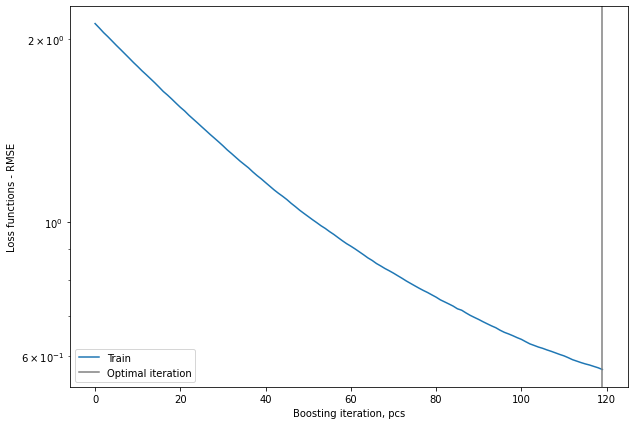

In [29]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [30]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [31]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.2
Relative bias(%):  -8.74
RMSE: 0.6
Relative RMSE(%):  0.231
MSE: 0.3
R square: 59.9%


In [32]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 1.105
a1: 0.467
R^2: 0.776
Uncertainty
a0: 1.11+/-0.07
a1: 0.467+/-0.025


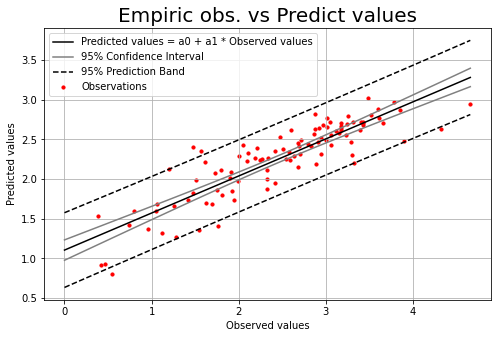

In [33]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(0, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

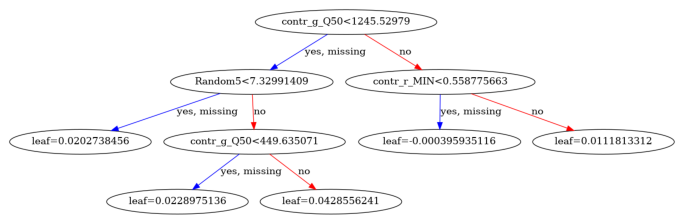

In [35]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=1) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

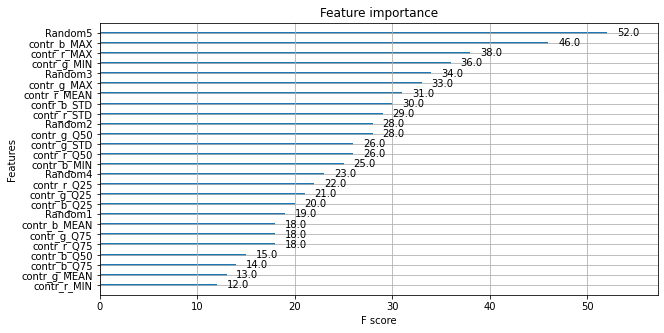

In [38]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

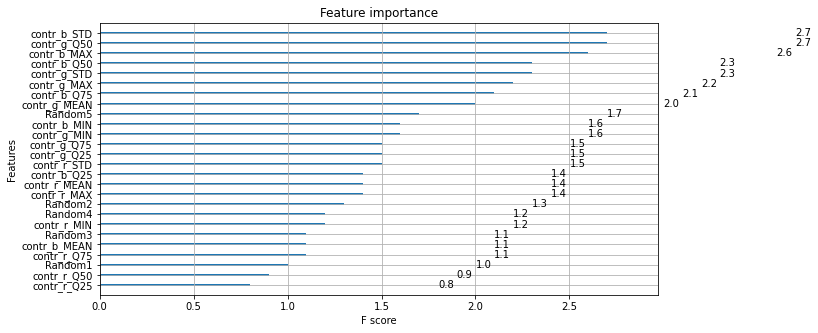

In [39]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

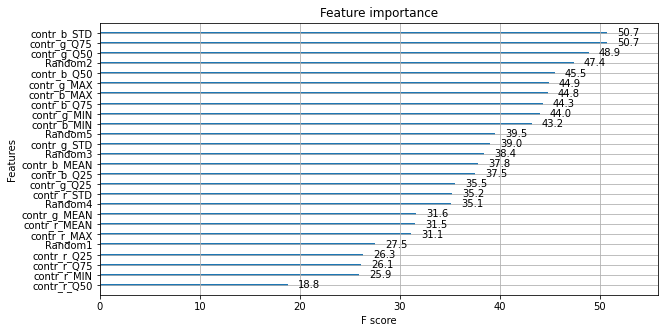

In [40]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [41]:
# Load SHAP`s library
import shap

In [42]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


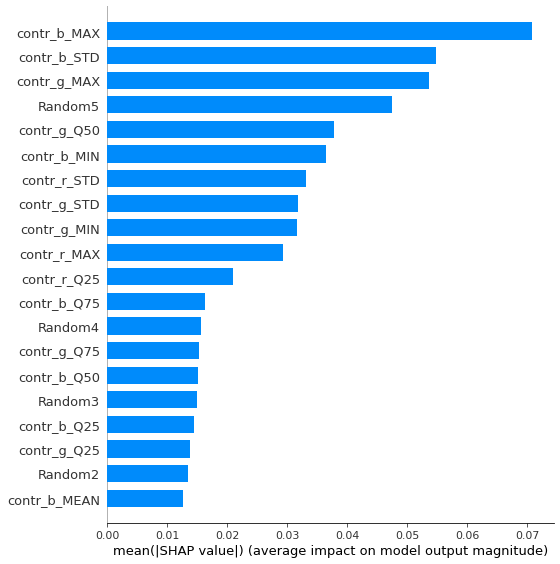

In [43]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

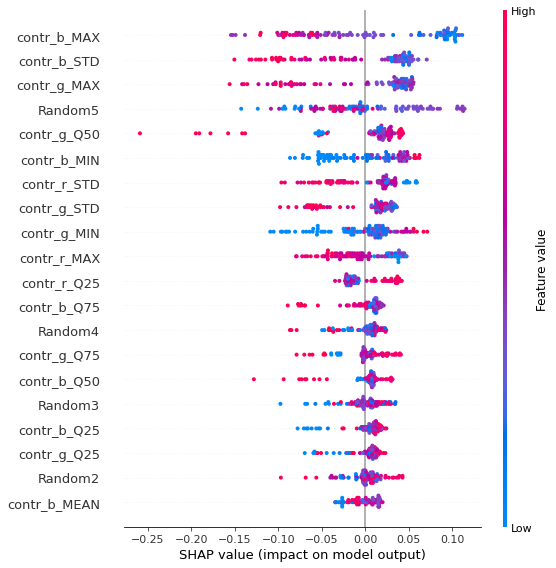

In [44]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

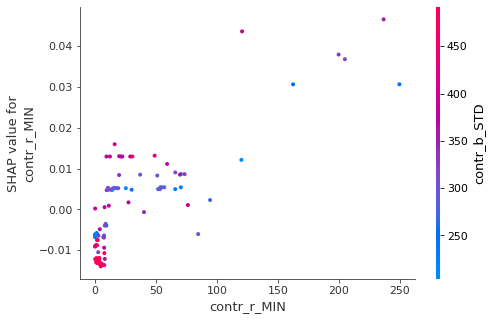

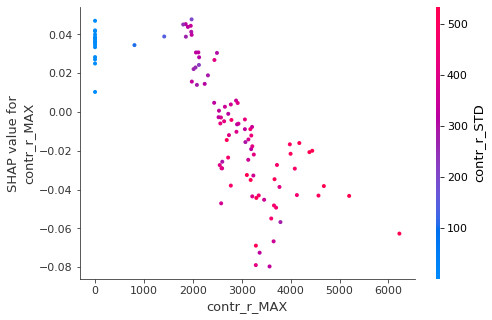

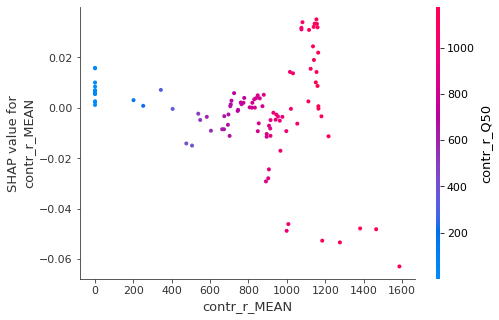

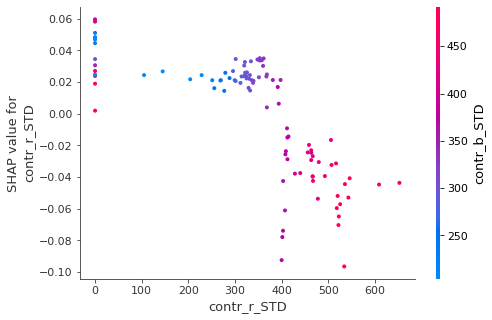

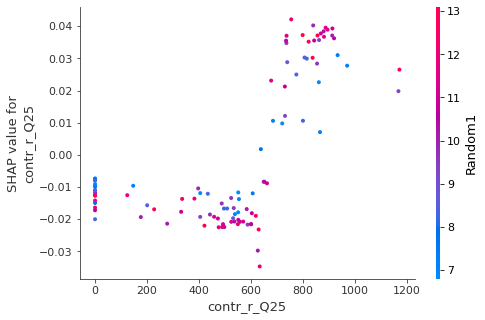

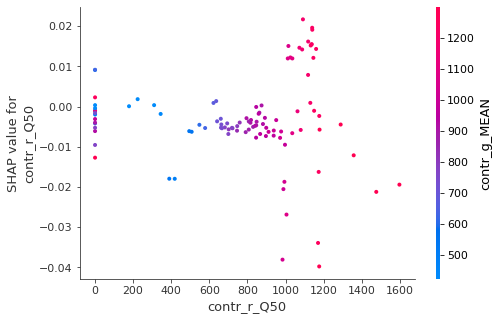

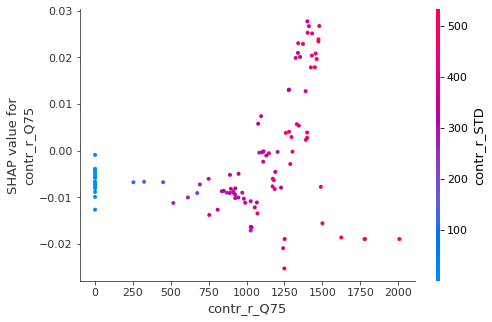

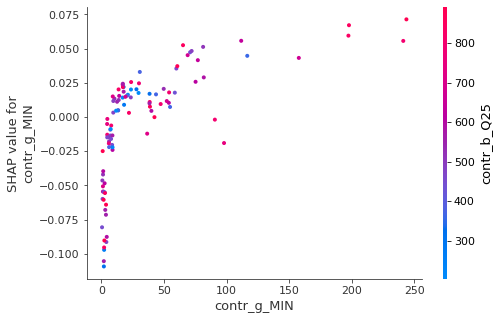

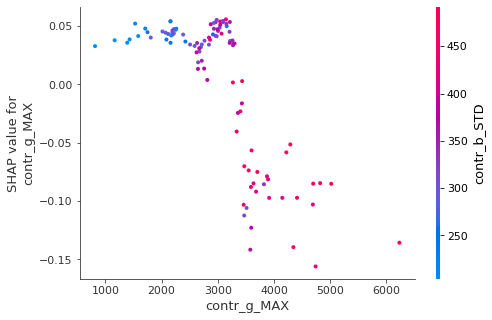

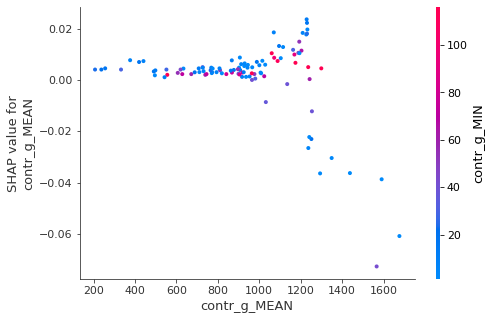

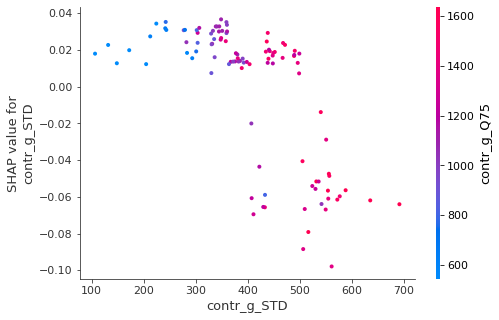

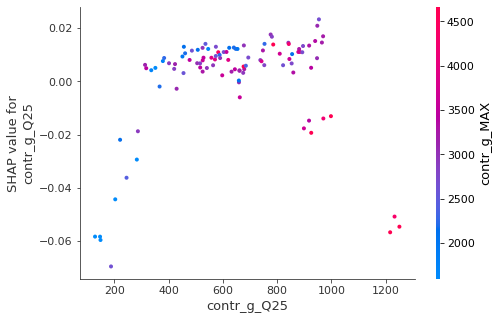

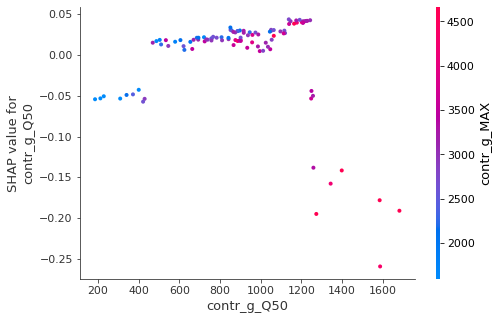

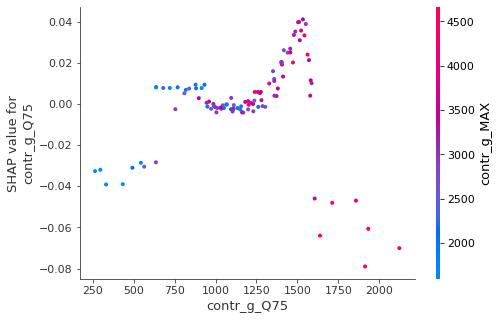

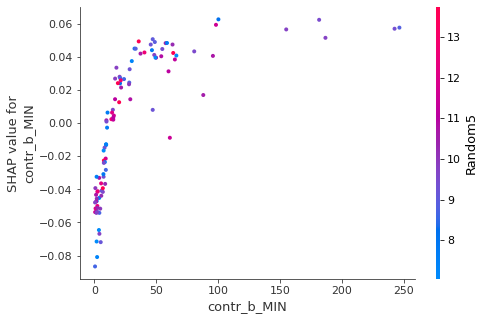

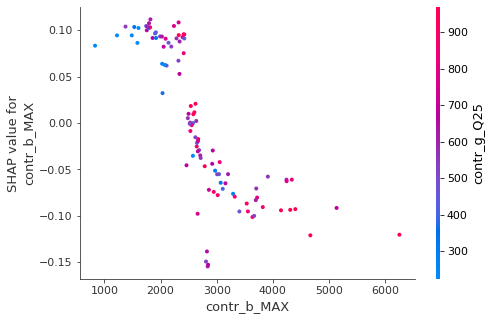

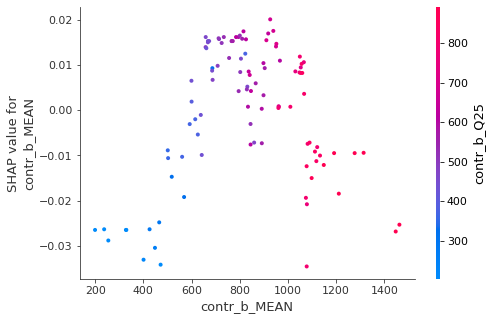

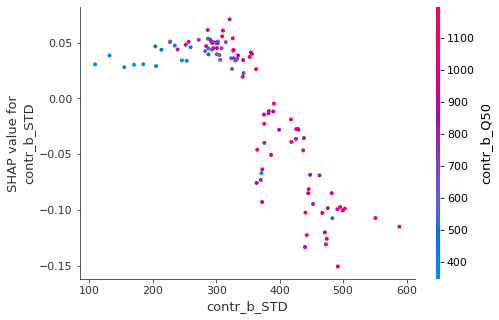

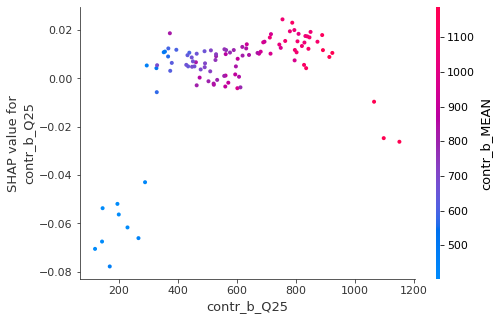

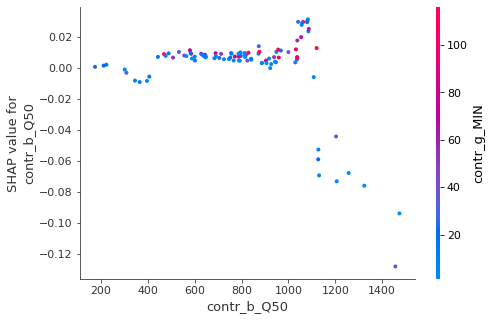

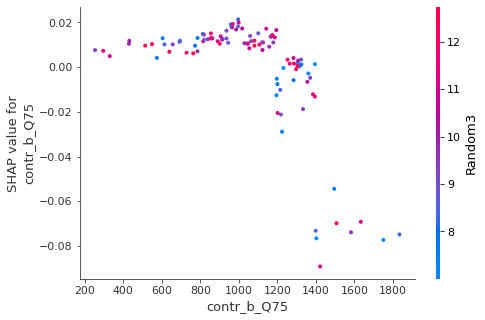

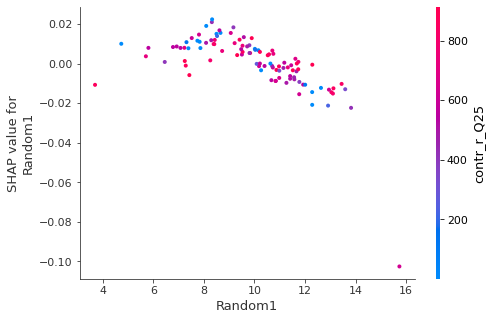

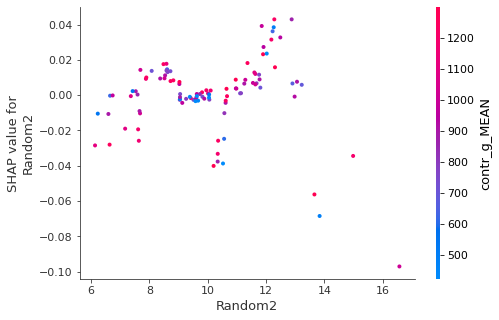

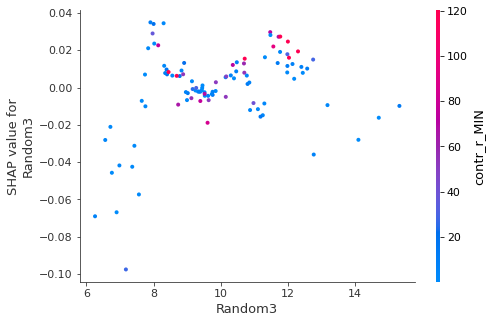

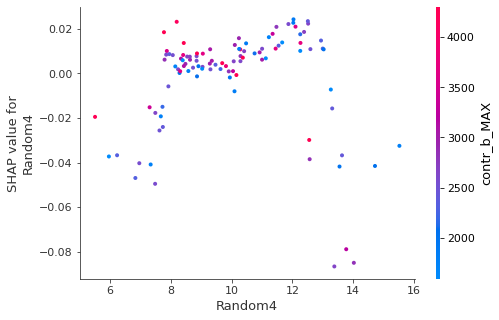

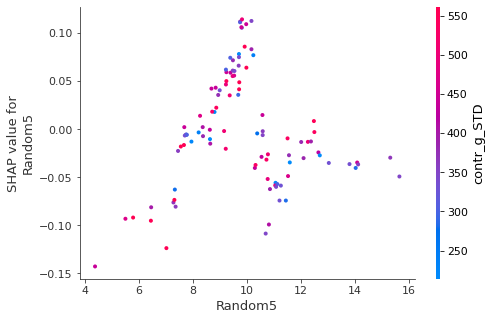

In [45]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [ ]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_Tag_Sr_XGB_model_.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_Tag_St_XGB_model_.txt")